In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({'font.size':16}) 

In [3]:
data = pd.read_csv('./data/C2_Ohms_Fitting.csv')

# Additional examples

This page contains the additional examples shown during the C2 sessions. Last update: 3pm, Friday 20th October 2023. 

## How to read error messages

AttributeError: Line2D.set() got an unexpected keyword argument 'markerfacecolour'

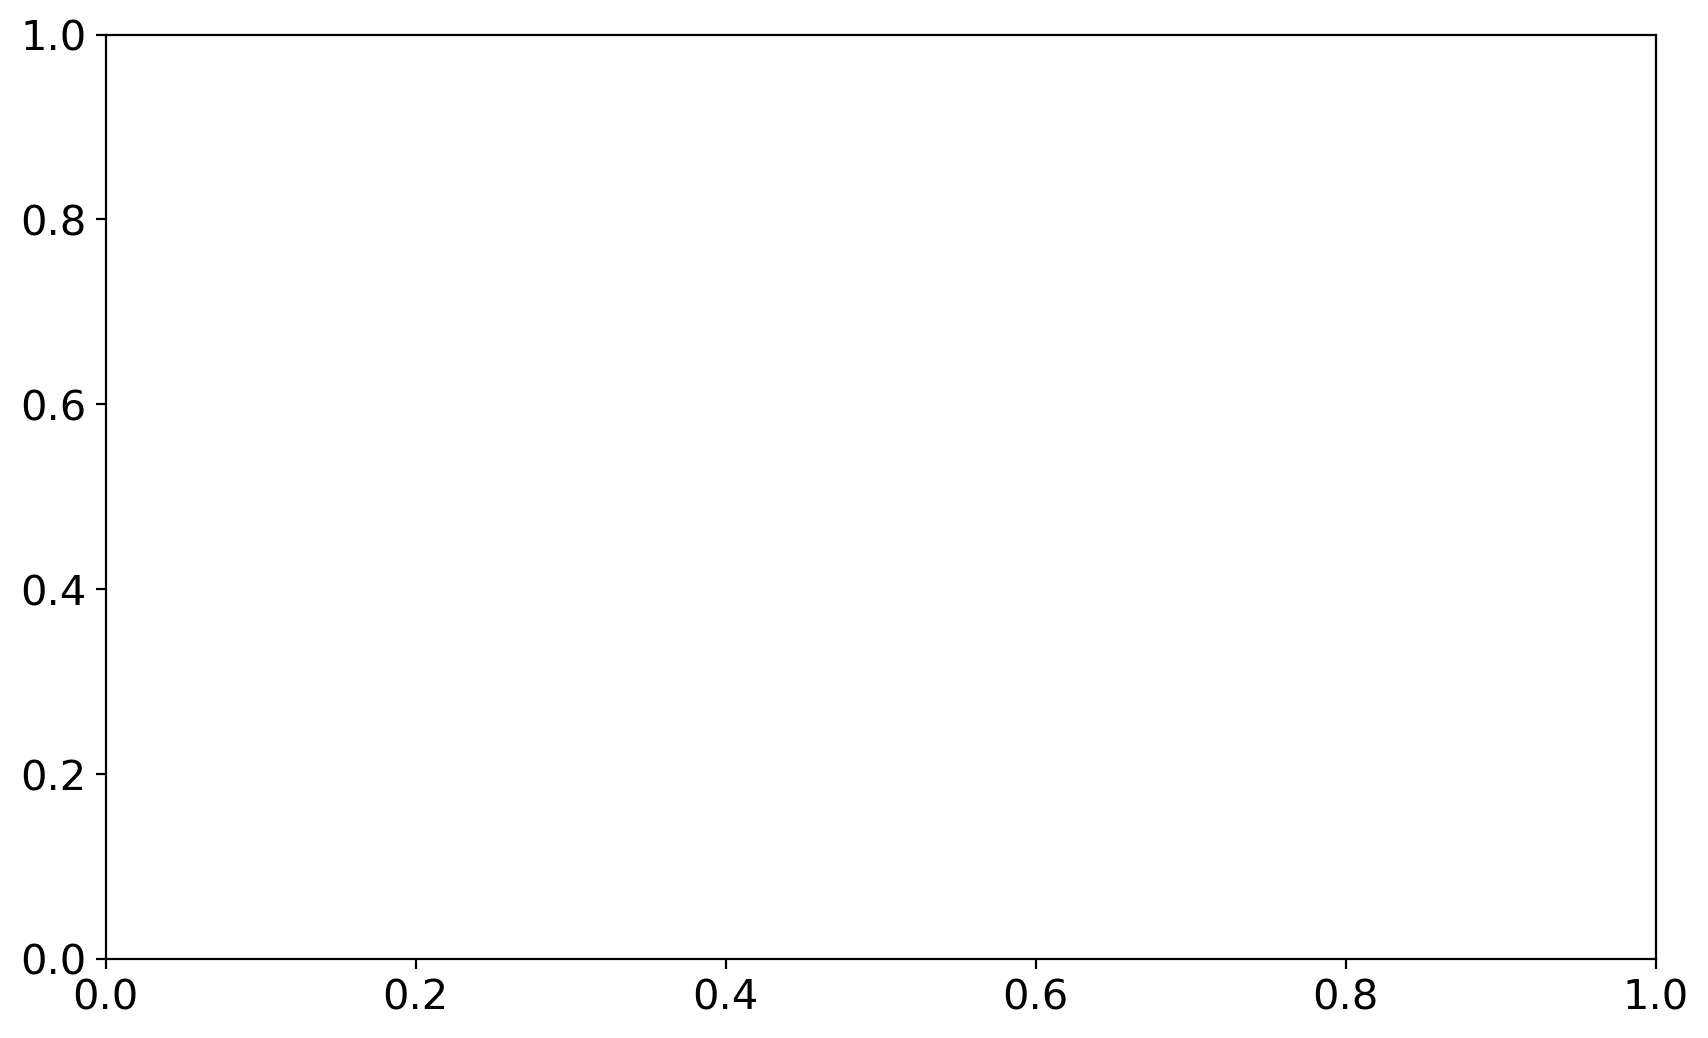

In [4]:
plt.rcParams.update({'font.size':15})  

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data['V'], 
            data['I_mA'],           
            yerr=data['I_unc_mA'],     
            marker='o',             
            markersize = 7,
            markerfacecolour = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (mA)')

ax.tick_params(direction='in', length=7)

plt.show()

The last line of an error message tells you what the problem is. 
```python
AttributeError: Line2D.set() got an unexpected keyword argument 'markerfacecolour'
```
Here the problem is that we've used a word that python doesn't understand: `markerfacecolour`

The problem is that `matplotlib` uses American spelling, so it doesn't understand `markerfacecolour`. What we should use instead is `markerfacecolor` (without the `u` in color).

Making that change and running it again:

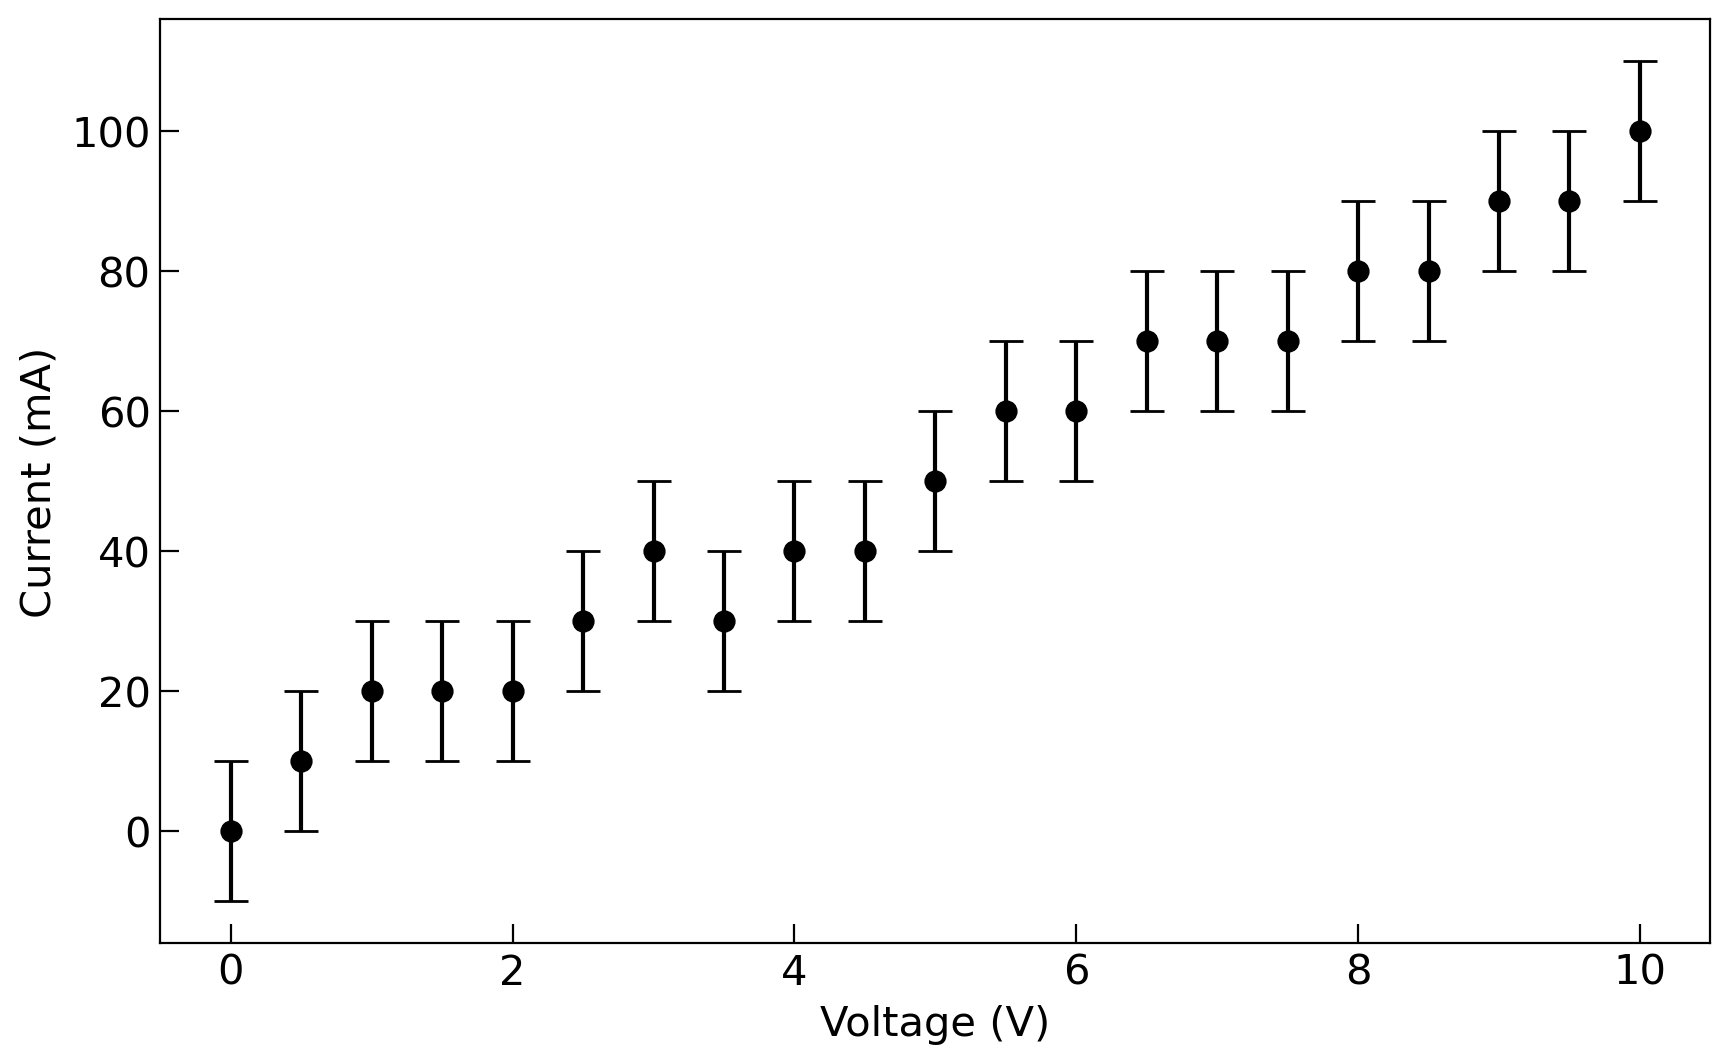

In [ ]:
plt.rcParams.update({'font.size':15})  

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data['V'], 
            data['I_mA'],           
            yerr=data['I_unc_mA'],     
            marker='o',             
            markersize = 7,
            markerfacecolor = 'black',
            color='black',          
            linestyle='none',       
            capsize=6,              
            )
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (mA)')

ax.tick_params(direction='in', length=7)

plt.show()

Now it works as expected

### What if you don't know how to fix it? 

Some errors are easy to fix, but others are not. If you find yourself stuck with an error message that you can't solve then you should **google the error message**.
```{image} images/oriley_google.jpeg
:alt: googleing the error message is an important skill
:width: 400px
:align: center
```

This isn't "cheating" - this is how it's done in the real world. 

When you are googling the error message, try to stick to sources that are likely to be reliable. These are things like the package documentation, Stack Exchange, or sites like Code Academy. **Do not** just blindly copy and paste their code. Make sure you understand what it's doing and edit it so it's appropriate for what you're trying to do. 

```{admonition} Do not use ChatGPT (or similar AI tools)
:class: danger
It can be very tempting to use tools like ChatGPT to write your code. **Do not do it**. Why not?
* You're unlikely to learn anything, and the point of the course is to learn Python;
* It often won't run correctly. ChatGRT tends to miss out imports (but doesn't tell you that);
* It often gives the wrong answer, but does so very confidently;
* For this unit, even if it gives you something that runs, **it won't give you code that will pass the coursework**. 

**If you did submit code written by ChatGPT for your coursework, this would be classed as Academic Misconduct.** 
```


## Formatting with `fstrings`

Without `fstrings`: hard to read

In [6]:
def line(x, slope, intercept):          
    return slope*x + intercept


In [7]:
popt, pcov = curve_fit(line,data['V'],data['I_mA'])

In [8]:
popt, pcov = curve_fit(line,data['V'],data['I_mA'])
slope = popt[0]
intercept = popt[1]
err_slope = np.sqrt(float(pcov[0][0]))
err_intercept = np.sqrt(float(pcov[1][1]))

In [9]:
annotation ='$I = {0:.3f} ( \pm {1:.3f})V {2:+.3f} (\pm {3:.3f})$'.format(slope, err_slope, intercept, err_intercept)

Use `fstrings` instead! 
* Start the string with `f` before the first quotation mark
* Put the variable names directly in the brackets

In [10]:
annotation_new =f'$I = {slope:.3f} ( \pm {err_slope:.3f})V {intercept:+.3f} (\pm {err_intercept:.3f})$'

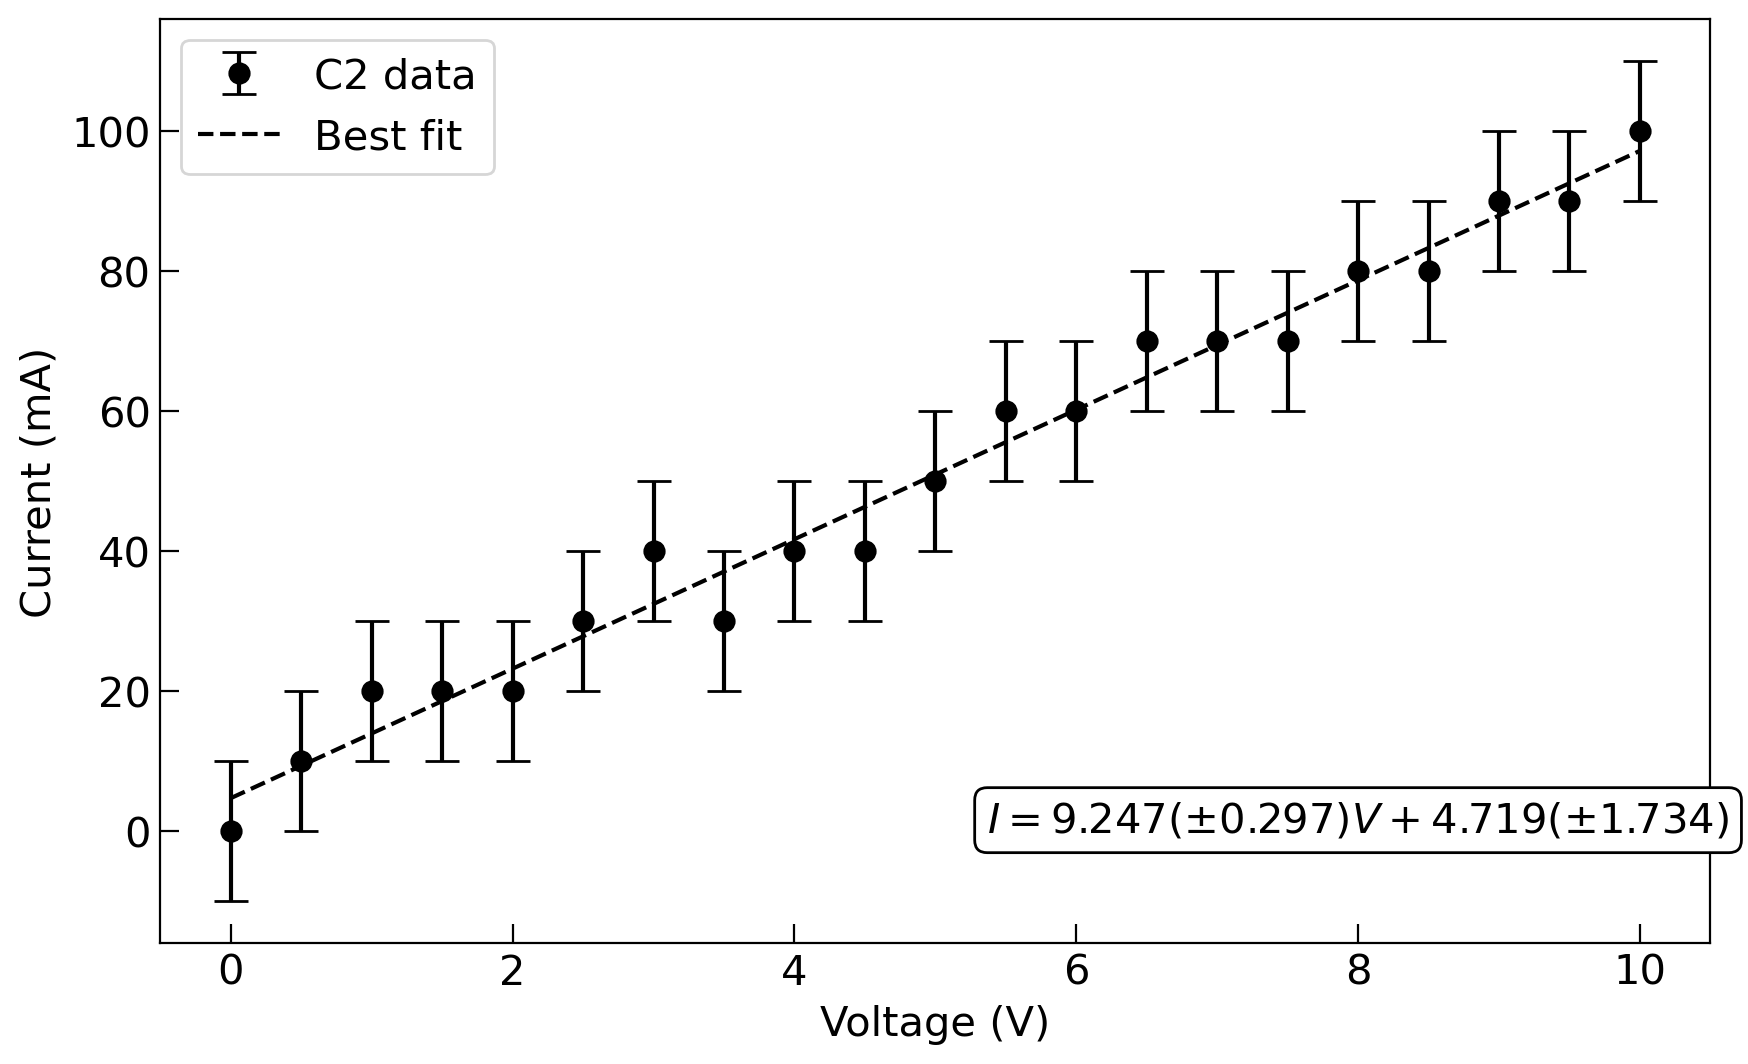

In [11]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.errorbar(data['V'],           
             data['I_mA'],              
             yerr=data['I_unc_mA'],     
             marker='o',             
             markersize = 7,        
             color='black',         
             ecolor='black',        
             markerfacecolor='black',
             linestyle='none',       
             capsize=6,  
             label = "C2 data"
             )

ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (mA)')

ax.tick_params(direction='in',      
                length=7,           
               )
ax.plot(data['V'], data['V']*slope+intercept, 
         linestyle='--',
         color='black',
         label='Best fit')

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1],loc=0, numpoints=1)

ax.annotate(annotation_new, xy=(8, 0), xycoords='data', ha='center', bbox=dict(boxstyle="round", fc="w"))
plt.show()

## Changing column names

For the final exercise of this worksheet you use another data file that I have provided, [data_2.csv](./data/data_2.csv).

In [12]:
df2 = pd.read_csv('./data/data_2.csv')

In [13]:
df2

,Time_s,Height_m,Unc_m
0,0.0,182.0,3.50
1,0.5,180.0,4.50
2,1.0,178.0,4.00
3,1.5,165.0,5.50
4,2.0,160.0,2.50
5,2.5,148.0,3.00
6,3.0,136.0,2.50
7,3.5,120.0,3.00
8,4.0,99.0,4.00
9,4.5,83.0,2.50


This all looks ok, but when we try to plot the time and height columns we get an error

In [14]:
plt.plot(df2['Time_s'], df2['Height_m'], 'k-')

KeyError: 'Height_m'

This is because I made a mistake when I was formatting the data file. We can find the mistake by checking the names of the columns:

Use `.columns` to check the names of the columns

In [15]:
df2.columns

Index(['Time_s', ' Height_m', ' Unc_m'], dtype='object')

Here we can see that there are spaces at the start of the height and uncertainty columns. This isn't good. However, we can fix it using `.rename()`

Using `.rename` to edit the column names. 

* Use `columns=` to tell it to edit the column names
* Use `{'old_name' : 'new_name'}` to tell it what to edit
* Use `inplace=True` to tell it to overwrite the old names

The cell below renames the `' Height_m'` and `' Unc_m'` columns so that they no longer contain spaces.  

In [16]:
df2.rename(columns={' Height_m': 'Height_m', ' Unc_m': 'Unc_m'}, inplace=True)

In [17]:
df2.columns

Index(['Time_s', 'Height_m', 'Unc_m'], dtype='object')

so now when we plot the data it will work

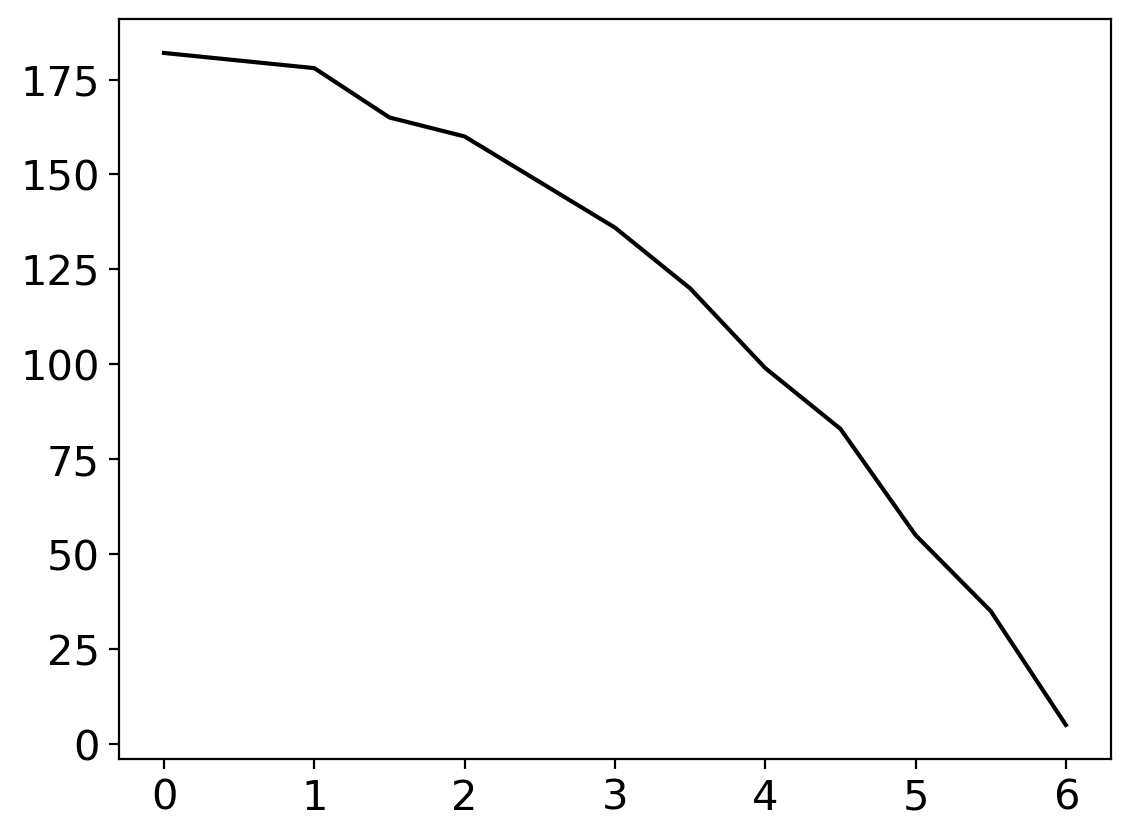

In [18]:
plt.plot(df2['Time_s'], df2['Height_m'], 'k-')

**Note**: The plot above is bad. See the [Plotting data](02_plotting_data.ipynb) page for what should be included in a plot. 

## Reusing code

It's absolutely fine to reuse code! Use the code that you're writing in these sessions as a **starting point** for things you do in the future. This means making sure that you edit things like axis labels, units, etc if you're reusing plotting code. 



